Разведочный анализ данных (EDA)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import math

In [2]:
fish = pd.read_csv('https://raw.githubusercontent.com/Ankit152/Fish-Market/main/Fish.csv')
fish.head()

# импорт данных

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
fish.info()

# информация о типах данных в наборе

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
fish.describe()

# количество наблюдений, среднее, отклонение, значения о разбросе данных

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
fish[fish['Weight']==0]

# вывод наблюдения с нулевым значением с помощью фильтрации

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [6]:
fish[fish['Weight']>0].groupby('Species').agg({'Weight':['mean', 'count']})

# исключаю наблюдение с 0 значением, группирую по виду, вывожу среднее значение по весу, а также количество по каждому виду

Weight      
                 mean count
Species                    
Bream      617.828571    35
Parkki     154.818182    11
Perch      382.239286    56
Pike       718.705882    17
Roach      160.052632    19
Smelt       11.178571    14
Whitefish  531.000000     6

In [7]:
fish.at[40,'Weight']=fish[(fish['Species']=='Roach')&(fish['Weight']>0)]['Weight'].mean()
fish.iloc[40]

# обращаюсь к строке 40, фильтрую наблюдения по нужному виду, вычисляю среднее значение для вида Roach

,40
Species,Roach
Weight,160.052632
Length1,19.0
Length2,20.5
Length3,22.8
Height,6.4752
Width,3.3516


<Axes: >

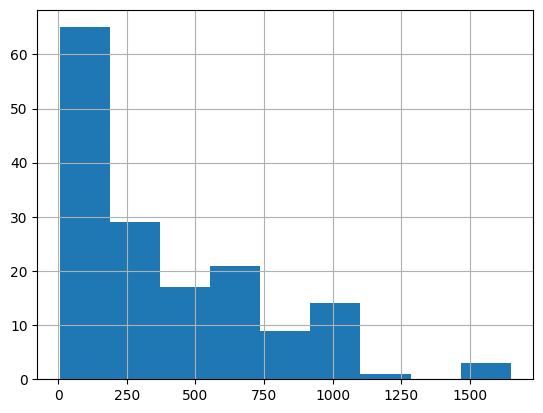

In [8]:
fish['Weight'].hist(bins='sturges')

Применяю Правило Стержеса для определения оптимального количества интервалов, на которые разбивается наблюдаемый диапазон.
Рассичитаю по формуле: n = 1 + 3.322 ln N, где N - число наблюдений


In [9]:
1+3.322*math.log10(159)

8.31304124699254

Формулой было расчитано 8 интервалов, что соответсвует построенной гистограмме.

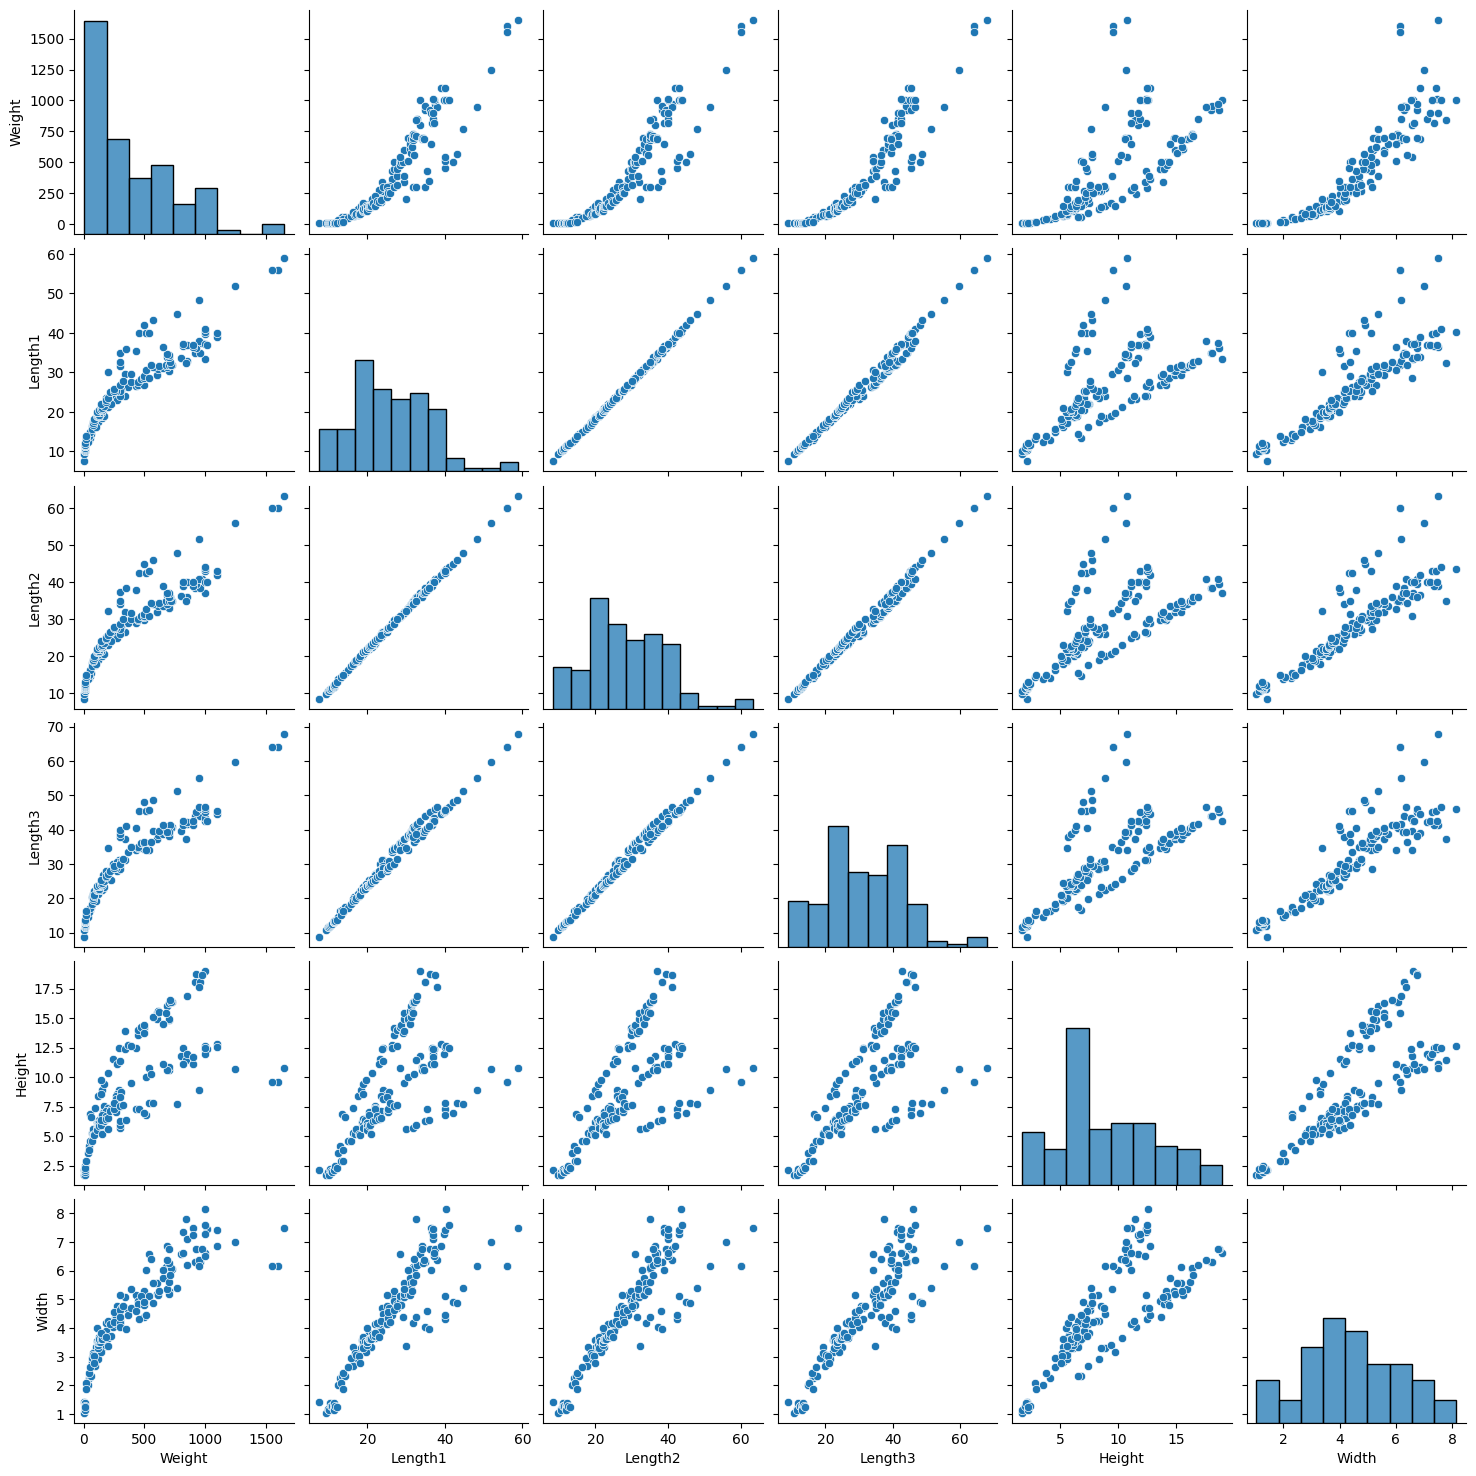

In [10]:
col = ['Weight','Length1','Length2','Length3','Height','Width']
sns.pairplot(fish.loc[:,col])

# строю визуализацию связи количественных факторов при помощи библиотеки seaborn

Проверка нормальности по критерию Шапиро-Уилка

Работает с выборками < 5000 наблюдений

Гипотеза НО: данная выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаю = 0,05



In [11]:
stats.shapiro(fish['Weight'])


# при помощи библиотеки stats обращаюсь к критерию Шапиро-Уилка

ShapiroResult(statistic=np.float64(0.8824602991414949), pvalue=np.float64(6.73636006062355e-10))

Так как значение pvalue значительно меньше установленного уровня значимости = 0,05, то гипотеза о том, что данная выборка принадлежит нормальной генеральной совокупности не подтверждается.


Критерии сравнения групп:

Установим взаимосвязь между категориальным фактором *вид рыбы* и количественным фактором *вес рыбы*.


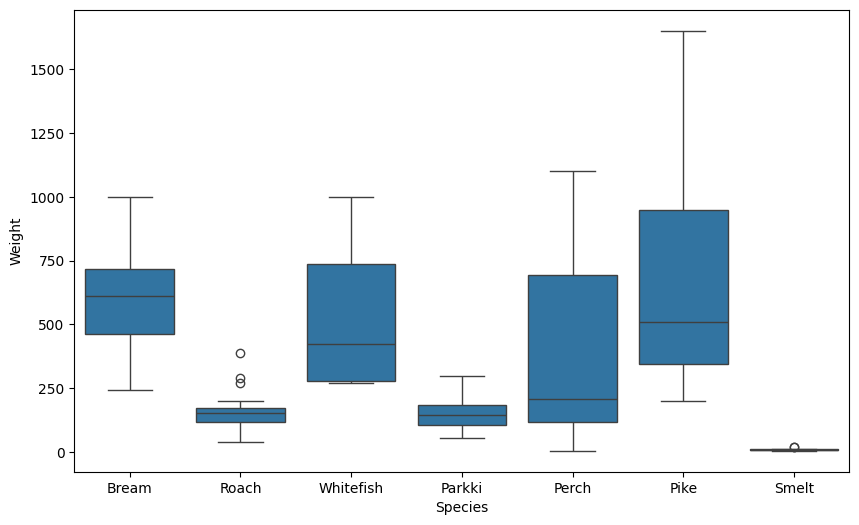

In [12]:
f, ax = plt.subplots(figsize=(10,6))
fig=sns.boxplot(x='Species',y='Weight',data=fish)

# пострим боксплоты (диаграмма размаха)

In [13]:
fish.groupby('Species')[['Weight']].median()

# вычислим медиану для веса каждого вида рыбы


,Weight
Species,
Bream,610.00
Parkki,145.00
Perch,207.50
Pike,510.00
Roach,155.00
Smelt,9.85
Whitefish,423.00


Так как выборка веса рыбы представлена неноромальным значением, необходимо установить взаимосвязь между весом рыбы и ее видом.

Критерий Краскала-Уолиса: непараметрический критерий, используется для сравнения трех и более независимых выборок.

Гипотеза НО: медианные значения выборок не имеют статистически значимых отличий, уровень значимости полагаем = 0.05

In [14]:
fish1=np.array(fish[fish['Species']=='Bream']['Weight'])
fish2=np.array(fish[fish['Species']=='Parkki']['Weight'])
fish3=np.array(fish[fish['Species']=='Perch']['Weight'])
fish4=np.array(fish[fish['Species']=='Pike']['Weight'])
fish5=np.array(fish[fish['Species']=='Roach']['Weight'])
fish6=np.array(fish[fish['Species']=='Smelt']['Weight'])
fish7=np.array(fish[fish['Species']=='Whitefish']['Weight'])

# формируем 7 выборок (по каждому виду рыб)

stats.mstats.kruskalwallis(fish1,fish2,fish3,fish4,fish5,fish6,fish7)

# обращаюсь к библиотеке stats (критерий Краскала Уолиса)

KruskalResult(statistic=np.float64(79.97626227572155), pvalue=np.float64(3.613432706212754e-15))

Так как значение p-value значительно меньше установленного уровня значимости =0.05, то мы отвергаем нулевую гипотезу в пользу альтернативной. То есть, медианные значения выборок имеют статистически значимые отличия в зависимости от вида рыбы.

In [15]:
fish[col].corr(method='pearson')

# воспользуюсь корреляцией Пирсона, которая устанавливает насколько сильная линейная связь существует между двуми количественными непрерывными факторами

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915971,0.918846,0.923319,0.724526,0.886955
Length1,0.915971,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918846,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923319,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724526,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886955,0.867050,0.873547,0.878520,0.792881,1.000000


<Axes: >

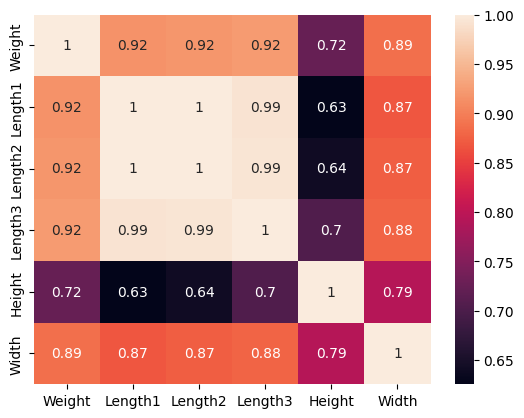

In [16]:
sns.heatmap(fish[col].corr(),annot=True)

# представим также в виде тепловой карты